## Deployment – How do stakeholders access the results?

“Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process across the enterprise.”

Luckily I can do both.

### Implementing a repeatable process.

I am already a step ahead on this one because in the formating data process I have defined two functions that are goin to be usefull to automate the process.

The tweak function and the drop_columns function can be used in any data frame with the same caracteristics.

I will repeat the process for the dr15, 16, 17, and 18 data frames of the SDSS


#### Loading Data

In [ ]:
import glob
import pandas as pd

In [ ]:
def get_path():
  csv_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/*.csv' )
  csv_files.sort()
  return csv_files


In [ ]:
def get_dataframes():
  csv_files = get_path()

  dr_list =[]

  for filename in csv_files:
    data = pd.read_csv(filename)
    dr_list.append(data)

  return dr_list

In [ ]:
# This shows de load of the data frames
dr14, dr15, dr16, dr17, dr18 = get_dataframes()

In [ ]:
dr15.sample(3)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
3766,1237648721759830129,162.300580,0.250155,18.14244,16.99737,16.50883,16.29295,16.18737,756,301,4,310,2881320044086716416,STAR,-0.000222,2559,54208,517
1278,1237649918971347047,28.185041,13.192562,17.06486,15.50511,14.73543,14.33414,14.00501,1035,301,2,148,484197464572717056,GALAXY,0.026178,430,51877,220
9438,1237650760787492900,197.313801,-3.208464,17.59574,16.42044,16.43263,16.49120,16.60187,1231,301,2,187,382884067038750720,STAR,-0.000173,340,51990,284


In [ ]:
dr16.sample(3)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
2645,1237658423545757919,141.469585,5.425715,19.13759,17.89257,17.43370,17.14787,16.95765,3015,301,3,183,1115942500079527936,GALAXY,0.076912,991,52707,639
504,1237651504342171914,200.629671,-0.190190,19.33533,18.79966,18.25171,17.87067,17.71314,1404,301,3,11,334478891739539456,QSO,0.172762,297,51959,315
6172,1237658297912131879,132.841122,3.365650,19.31013,17.96400,17.40976,17.22310,17.08856,2986,301,1,94,3279855631095326720,STAR,0.000444,2913,54526,397


In [ ]:
dr18.sample(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
2751,1237663458850701769,318.280055,0.852364,18.81250,17.31538,16.57080,16.14220,15.87049,4187,301,6,71,1110257195901020160,GALAXY,0.070501,986,52443,436
8435,1237661212046721205,223.519778,43.551917,19.47796,17.67431,16.52501,16.05089,15.68847,3664,301,5,83,1452535170509858816,GALAXY,0.152102,1290,52734,452
1808,1237650762934976698,197.282832,-1.595715,18.29363,17.22836,16.78056,16.45511,16.29480,1231,301,6,187,382914853364328448,GALAXY,0.083906,340,51990,396


In [ ]:
def drop_columns(df):
  dc=['rerun', 'objid', 'ra', 'fiberid','field','plate']
  for col in sorted(df.columns):
    if col in dc:
      df.drop(col, axis=1, inplace=True)
  return df

In [ ]:
# The purpose of this function is create new data set replacing the outlier data using the clip function
def tweak_dr(df_):
  drop_columns(df_)
  return(df_
      .rename(columns={'class': 'Class'})
      .assign(dec= lambda df_: df_.dec.clip(lower= df_.dec.quantile(.25),
                                            upper= df_.dec.quantile(.75)),
              u= lambda df_: df_.u.clip(lower= df_.u.quantile(.25),
                                        upper= df_.u.quantile(.75)),
              g= lambda df_: df_.g.clip(lower= df_.g.quantile(.25),
                                        upper= df_.g.quantile(.75)),
              r= lambda df_: df_.r.clip(lower= df_.r.quantile(.25),
                                        upper= df_.r.quantile(.75)),
              i= lambda df_: df_.i.clip(lower= df_.i.quantile(.25),
                                        upper= df_.i.quantile(.75)),
              z= lambda df_: df_.z.clip(lower= df_.z.quantile(.25),
                                        upper= df_.z.quantile(.75)),
              camcol= lambda df_: df_.camcol.clip(lower= df_.camcol.quantile(.25),
                                                  upper= df_.camcol.quantile(.75),),

      )

  )

In [ ]:
dr_list = [dr14, dr15, dr16, dr17, dr18]

In [ ]:
for dr in dr_list:
  tweak_dr(dr)


In [ ]:
dr15 = tweak_dr(dr15)
dr15.sample()

,dec,u,g,r,i,z,run,camcol,specobjid,Class,redshift,mjd
5461,50.563922,19.266714,18.029576,17.540852,17.24993,17.01122,1336,3,395271709843810304,GALAXY,0.102393,51695


#### Generate test design

In [ ]:
X = dr15.drop('Class', axis=1)
X

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,mjd
0,0.089693,19.266725,17.042400,16.205588,15.859775,15.614920,752,4,3722360139651588096,-0.000009,54922
1,0.135285,18.662800,17.214490,16.676370,16.489220,16.391500,752,4,363814405953054720,-0.000055,51615
2,0.126185,19.266725,18.029592,17.474280,17.087320,16.801250,752,4,323274319570429952,0.123111,52023
3,0.049911,18.206925,16.850475,16.205588,15.982330,15.904380,752,4,3722365362331820032,-0.000111,54922
4,0.102557,18.206925,16.850475,16.438690,16.554920,16.613260,752,4,3722365912087633920,0.000590,54922
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.916826,18.728780,18.029592,17.540920,17.036100,16.291100,1231,4,371722106246817792,-0.000100,52370
9996,-0.916826,18.761660,18.029592,17.540920,17.275022,17.158212,1231,4,371722656002631680,1.048052,52370
9997,-0.916826,19.266725,17.690770,16.986890,16.676560,16.438350,1231,4,371711111130540032,0.020118,52370
9998,-0.916826,19.266725,17.362630,16.386490,15.952490,15.614920,1231,4,372749324951513088,0.081532,52368


In [ ]:
y = dr15.Class
y

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995      STAR
9996       QSO
9997    GALAXY
9998    GALAXY
9999    GALAXY
Name: Class, Length: 10000, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

X_train.shape, y_train.shape

((2000, 11), (2000,))

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Build model

#### Desicion Tree

[Text(0.4583333333333333, 0.875, 'GALAXY <= -0.383\ngini = 0.556\nsamples = 2000\nvalue = [1120, 182, 698]'),
 Text(0.25, 0.625, 'GALAXY <= -0.847\ngini = 0.006\nsamples = 700\nvalue = [2, 0, 698]'),
 Text(0.16666666666666666, 0.375, 'GALAXY <= -0.848\ngini = 0.02\nsamples = 196\nvalue = [2, 0, 194]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.01\nsamples = 195\nvalue = [1, 0, 194]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 504\nvalue = [0, 0, 504]'),
 Text(0.6666666666666666, 0.625, 'GALAXY <= 0.102\ngini = 0.241\nsamples = 1300\nvalue = [1118, 182, 0]'),
 Text(0.5, 0.375, 'STAR <= 2.975\ngini = 0.019\nsamples = 1122\nvalue = [1111, 11, 0]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.018\nsamples = 1120\nvalue = [1110, 10, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.8333333333333334, 0.375, 'STAR <= 1.194\ngini = 0.076\nsamples = 178\nvalue = [7, 171, 

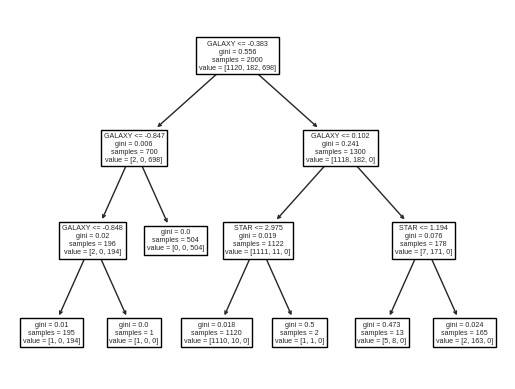

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

tree.plot_tree(dt, feature_names=y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[4322   33   24]
 [  61  764    1]
 [  15    0 2780]]

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98      4379
         QSO       0.96      0.92      0.94       826
        STAR       0.99      0.99      0.99      2795

    accuracy                           0.98      8000
   macro avg       0.98      0.97      0.97      8000
weighted avg       0.98      0.98      0.98      8000



In [ ]:
Evaluation=pd.DataFrame(['Decision Tree'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.98325,0.98325,0.98325,0.98325
